In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection  import  GridSearchCV
from sklearn.metrics import confusion_matrix
from  sklearn.decomposition  import  PCA
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
#Part A
df = pd.read_csv('/Users/Kevin/Desktop/Face/label.csv')
y = df['Label']
y

0      13
1      30
2      34
3      19
4      24
       ..
395    32
396    19
397    11
398     4
399    17
Name: Label, Length: 400, dtype: int64

In [3]:
df.shape[0]

400

In [4]:
#importing images from desktop
images = []
for i in range(400):
    images.append(mpimg.imread('/Users/Kevin/Desktop/Face/' + str(i) + '.jpg'))

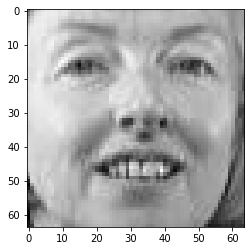

In [5]:
plt.imshow(images[69], cmap=plt.cm.gray)

In [6]:
#Part B
#building feature matrix and label vector
columns = []
for k in range(4096):
    columns.append("Pixel " + str(k))
images_df = pd.DataFrame(columns=columns)
    
for z in range(len(images)):
    pixels = images[z].flatten()
    images_df.loc[z] = pixels
    
images_df.head()

,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 4086,Pixel 4087,Pixel 4088,Pixel 4089,Pixel 4090,Pixel 4091,Pixel 4092,Pixel 4093,Pixel 4094,Pixel 4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117


In [7]:
#Part C
scale_X = preprocessing.scale(images_df)
scale_X

array([[ 1.37649641,  1.11885303,  0.79610373, ..., -1.17094622,
        -1.24726506, -1.21711982],
       [ 1.68113398,  1.3654141 ,  1.03570156, ...,  0.68710075,
         1.48558299,  1.58234648],
       [-0.31593455, -0.59063704, -0.75329558, ...,  1.84210291,
         1.84204144,  1.13304942],
       ...,
       [ 0.98723729,  1.02022861,  1.01972837, ..., -0.58507555,
        -0.48342554, -0.38764832],
       [ 0.68259971,  0.52710647,  0.34885444, ...,  0.88797069,
         0.63687242,  0.71831368],
       [-0.231313  , -0.67282406, -1.0088666 , ..., -0.06616154,
        -0.55132239, -0.50861291]])

In [8]:
#Part D
X_train, X_test, y_train, y_test = train_test_split(scale_X, y, test_size=0.25, random_state=5)

In [9]:
#Part E
#Principal Component Analysis
k = 50
my_pca = PCA(n_components = k)
X_Train_new = my_pca.fit_transform(X_train)
X_Test_new = my_pca.transform(X_test)

In [13]:
#Part F
my_svc = SVC(C=1,kernel='rbf',gamma=0.0005,random_state=1)
my_svc.fit(X_Train_new,y_train)
y_predict = my_svc.predict(X_Test_new)

In [14]:
SVC_accuracy = accuracy_score(y_test,y_predict)

print("The accuracy is: ")
print(SVC_accuracy)

The accuracy is: 
0.91


In [15]:
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


In [22]:
#Part G
C = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]
param_grid = dict(C = C)
X_normalized_pca=my_pca.fit_transform(scale_X)

grid = GridSearchCV(my_svc, param_grid=param_grid , cv=10, scoring='accuracy')
grid.fit(X_normalized_pca,y)

GridSearchCV(cv=10, estimator=SVC(C=1, gamma=0.0005, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0,
                               50000.0, 100000.0]},
             scoring='accuracy')

In [23]:
print('The best C is:', grid.best_params_ )

The best C is: {'C': 10}


In [25]:
print('The accuracy is: ', grid.best_score_)

The accuracy is:  0.9649999999999999
